<a href="https://colab.research.google.com/github/skywalker0803r/mxnet_course/blob/master/mxnet_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install mxnet d2lzh
%matplotlib inline
import d2lzh as d2l
from d2lzh import *
from mxnet import autograd, gluon, nd
from mxnet.gluon import data as gdata, loss as gloss, nn

# create data

In [0]:
n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], 5
features = nd.random.normal(shape=(n_train + n_test, 1))
poly_features = nd.concat(features, nd.power(features, 2),
                          nd.power(features, 3))
labels = (true_w[0] * poly_features[:, 0] + true_w[1] * poly_features[:, 1]
          + true_w[2] * poly_features[:, 2] + true_b)
labels += nd.random.normal(scale=0.1, shape=labels.shape)

In [3]:
features[:2], poly_features[:2], labels[:2]

(
 [[2.2122064]
  [0.7740038]]
 <NDArray 2x1 @cpu(0)>, 
 [[ 2.2122064   4.893857   10.826221  ]
  [ 0.7740038   0.5990819   0.46369165]]
 <NDArray 2x3 @cpu(0)>, 
 [51.674885   6.3585763]
 <NDArray 2 @cpu(0)>)

# 定義訓練和測試模型

In [0]:
num_epochs, loss = 100, gloss.L2Loss()

def fit_and_plot(train_features, test_features, train_labels, test_labels):
    net = nn.Sequential()
    net.add(nn.Dense(1))
    net.initialize()
    batch_size = min(10, train_labels.shape[0])
    train_iter = gdata.DataLoader(gdata.ArrayDataset(
        train_features, train_labels), batch_size, shuffle=True)
    trainer = gluon.Trainer(net.collect_params(), 'sgd',
                            {'learning_rate': 0.01})
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                l = loss(net(X), y)
            l.backward()
            trainer.step(batch_size)
        train_ls.append(loss(net(train_features),
                             train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features),
                            test_labels).mean().asscalar())
    print('final epoch: train loss', train_ls[-1], 'test loss', test_ls[-1])
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
             range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight:', net[0].weight.data().asnumpy(),
          '\nbias:', net[0].bias.data().asnumpy())

# 三階多項式擬合

final epoch: train loss 0.0071271 test loss 0.01194056


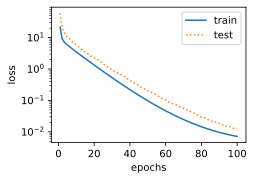

weight: [[ 1.3279434 -3.3619647  5.561891 ]] 
bias: [4.9515686]


In [5]:
fit_and_plot(poly_features[:n_train, :], poly_features[n_train:, :],
             labels[:n_train], labels[n_train:])

# 線性函數擬合 欠擬合

final epoch: train loss 43.997704 test loss 160.71243


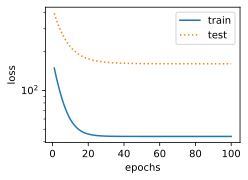

weight: [[15.565403]] 
bias: [2.2761967]


In [6]:
fit_and_plot(features[:n_train, :], features[n_train:, :], labels[:n_train],
             labels[n_train:])

# 訓練樣本不足 過擬合

final epoch: train loss 0.4027369 test loss 103.31421


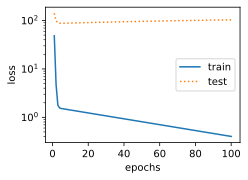

weight: [[1.3872364 1.9376589 3.5085924]] 
bias: [1.2312856]


In [7]:
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :], labels[0:2],
             labels[n_train:])